In [49]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
os.getcwd()

'/home/kinimv/code/lsst'

In [45]:
#df = pd.read_csv('/home/kinimv/code/lsst/prelim_survey_stddevs.dat', sep='\s+', header=None, skiprows=1)
df = pd.read_csv('/home/kinimv/code/lsst/prelim_survey_stddevs.dat', sep='\s+', header=None, skiprows=16)


In [98]:
df.columns = ['u','g','r','i','z','y','bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9']
#bins are [0.45,0.75,1.05,1.35,1.65,1.95,2.25,2.55,2.85]

In [99]:
df

,u,g,r,i,z,y,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9
0,NaN,27.45,27.57,26.87,26.09,24.89,0.0210,0.0131,0.0145,0.0234,0.0416,0.0517,0.0294,0.0445,0.0606
1,25.67,27.42,27.55,26.85,26.08,24.88,0.0178,0.0131,0.0145,0.0215,0.0277,0.0278,0.0257,0.0330,0.0408
2,26.09,27.38,27.53,26.83,26.06,24.86,0.0162,0.0132,0.0139,0.0212,0.0249,0.0268,0.0242,0.0303,0.0340
3,26.38,27.32,27.51,26.81,26.03,24.83,0.0173,0.0132,0.0141,0.0217,0.0259,0.0244,0.0240,0.0321,0.0327
4,26.32,27.56,27.62,26.92,26.15,NaN,0.0173,0.0130,0.0176,0.0307,0.0268,0.0257,0.0250,0.0293,0.0357
5,26.22,27.48,27.58,26.88,26.11,24.48,0.0171,0.0129,0.0148,0.0233,0.0267,0.0261,0.0252,0.0292,0.0344
6,26.09,27.38,27.53,26.83,26.06,24.86,0.0162,0.0132,0.0139,0.0212,0.0249,0.0268,0.0242,0.0303,0.0336
7,25.90,27.26,27.48,26.78,26.00,25.08,0.0183,0.0136,0.0147,0.0224,0.0260,0.0264,0.0231,0.0304,0.0348
8,24.84,26.13,26.28,25.58,24.81,23.61,0.0377,0.0454,0.0353,0.0648,0.0948,0.1091,0.1700,0.2774,0.4161
9,25.21,26.51,26.66,25.96,25.18,23.98,0.0290,0.0254,0.0298,0.0421,0.0668,0.0971,0.0806,0.2816,0.4428


In [100]:
#df.iloc[3,4]
#medianu = math.floor(df.u.median())
#mediany = math.floor(df.y.median())
#df.u = df.u.fillna(medianu)
df2 = df.drop(df.index[0])
df3 = df2.drop(df.index[4])
df3

,u,g,r,i,z,y,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9
1,25.67,27.42,27.55,26.85,26.08,24.88,0.0178,0.0131,0.0145,0.0215,0.0277,0.0278,0.0257,0.0330,0.0408
2,26.09,27.38,27.53,26.83,26.06,24.86,0.0162,0.0132,0.0139,0.0212,0.0249,0.0268,0.0242,0.0303,0.0340
3,26.38,27.32,27.51,26.81,26.03,24.83,0.0173,0.0132,0.0141,0.0217,0.0259,0.0244,0.0240,0.0321,0.0327
5,26.22,27.48,27.58,26.88,26.11,24.48,0.0171,0.0129,0.0148,0.0233,0.0267,0.0261,0.0252,0.0292,0.0344
6,26.09,27.38,27.53,26.83,26.06,24.86,0.0162,0.0132,0.0139,0.0212,0.0249,0.0268,0.0242,0.0303,0.0336
7,25.90,27.26,27.48,26.78,26.00,25.08,0.0183,0.0136,0.0147,0.0224,0.0260,0.0264,0.0231,0.0304,0.0348
8,24.84,26.13,26.28,25.58,24.81,23.61,0.0377,0.0454,0.0353,0.0648,0.0948,0.1091,0.1700,0.2774,0.4161
9,25.21,26.51,26.66,25.96,25.18,23.98,0.0290,0.0254,0.0298,0.0421,0.0668,0.0971,0.0806,0.2816,0.4428
10,25.71,27.00,27.15,26.45,25.68,24.48,0.0225,0.0167,0.0188,0.0280,0.0381,0.0542,0.0376,0.1243,0.4702
11,26.09,27.38,27.53,26.83,26.06,24.86,0.0163,0.0132,0.0139,0.0212,0.0249,0.0268,0.0243,0.0303,0.0339


In [102]:
df.bin1.iloc[0:3]

0    0.0210
1    0.0178
2    0.0162
Name: bin1, dtype: float64

In [103]:
reg = linear_model.LinearRegression()
#reg.fit(df3[['u','g','r','i','z','y']],df.test1)
reg.fit(df3.iloc[0:6][['u','g','r','i','z','y']],df.bin1.iloc[0:6])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
reg.coef_

array([-8.66423697e-04,  1.70592911e+07,  2.13892988e+07, -2.13892984e+07,
       -3.41185825e+07,  1.82618242e-02])

In [105]:
reg.intercept_

407074349.2710637

In [106]:
reg.predict([[25.90,27.26,27.48,26.78,26.00,25.08]])

array([0.01709998])

In [123]:
df3.iloc[0:7]['bin1'].describe()

count    7.000000
mean     0.020086
std      0.007805
min      0.016200
25%      0.016650
50%      0.017300
75%      0.018050
max      0.037700
Name: bin1, dtype: float64

### Counting other bands as unchanged

In [111]:
reg2 = linear_model.LinearRegression()
reg2.fit(df3.iloc[0:3][['u']],df.bin1.iloc[0:3])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
reg2.predict([[25.90]])

array([0.01924762])

In [113]:
reg3 = linear_model.LinearRegression()
reg3.fit(df3.iloc[5:7][['y']],df.bin1.iloc[5:7])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
reg3.predict([[25.08]])

array([0.0171])

### Plotting std deviation against  u band exposure
#### All other bands unchanged

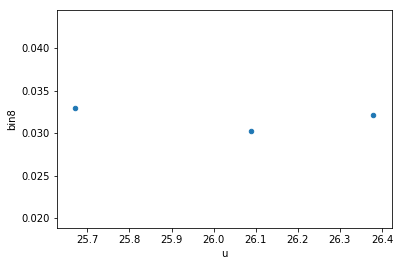

In [133]:
ax = plt.gca()
#plt.ylim(0.01, 0.02)
df3.iloc[0:3].plot(kind='scatter',x='u',y='bin8',ax=ax)

In [ ]:
ylim(0.01, 0.02)

### I see a sin function? - Fitting to a sin function

In [145]:
from scipy.optimize import leastsq

In [146]:
data = df3.iloc[0:3]["bin1"].tolist()

In [147]:
guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

In [148]:
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean


In [149]:
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (1000,) (3,) 

### Notes

If equally spaced data
https://scipy-cookbook.readthedocs.io/items/Interpolation.html